In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
file = 'dnn_model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
trained_model = 'dnn_model/frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(trained_model, file)

In [6]:
model.setInputSize(320, 320)
model.setInputScale(1.0/ 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000019C50E736F0>

[ 1 32]     [0.65336275 0.6414563 ]


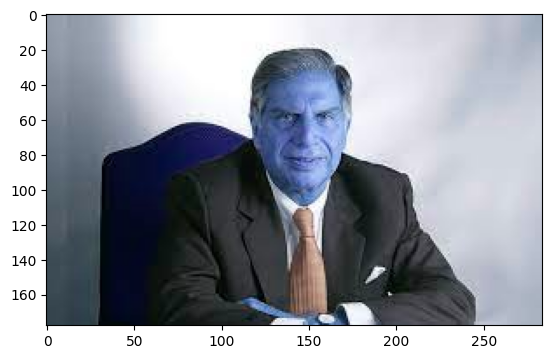

In [30]:
img = cv2.imread('images/person.png')
plt.imshow(img)
idx, conf, bbox = model.detect(img, confThreshold=0.6)
print(idx,'   ', conf)
boxs = bbox

True

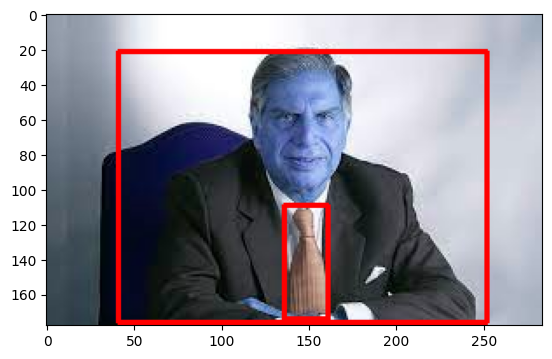

In [31]:
font = cv2.FONT_HERSHEY_PLAIN
for classes_idx, confidence, bboxs in zip(idx.flatten(), conf, bbox):
    cv2.rectangle(img, bboxs, (255, 0, 0), thickness=2)
    # cv2.putText(img, classes[classes_idx-2], (bboxs[0]+10, bboxs[1]+40), font, fontScale=2, color=(0,255,0), thickness=2)

plt.imshow(img)
cv2.imwrite('result.png', img)

In [33]:
for i in range(len(boxs)):
    x, y, w, h = boxs[i]

    crop_img = img[y:y+h, x:x+w]

    cv2.imshow('crop_img', crop_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    cv2.imwrite(f'croped/img{(i+1)}.png', crop_img)

#     print(f'{x} {y} {w} {h}')